#                       Курсовая работа

## Часть 1. Метод наименьших квадратов

В МНК наша задача: подобрать параметры функциональной зависимости так, чтобы она наилучшим образом описывала экспериментальные данные  Например, для линейной функции достаточно определить два параметра k и b, чтобы построить аппроксимацию (приближение) линейного графика к экспериментальным зависимостям.

Cчитаем данные из excel листа и выведем их.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_excel('/Users/sabinabekkieva/Desktop/МНК.xlsx')
x = data.iloc[:,0].tolist()
y = data.iloc[:,1].tolist()
print(x)
print(y)

[0, 10, 20, 24, 30, 47, 50, 71, 75, 94, 100, 125, 140, 150, 189, 200, 250, 282, 300, 379, 400, 500, 565, 600, 700, 800, 840, 900]
[10.1, 9.89, 9.75, 9.69, 9.52, 9.06, 9.04, 8.92, 8.83, 8.37, 8.26, 7.85, 7.64, 7.5, 6.98, 6.85, 6.32, 6.05, 5.95, 5.6, 5.5, 5.02, 4.74, 4.62, 4.33, 4.08, 3.99, 3.85]


Найдем параметры апроксимирующей функции, а именно в виде y = kx+b

In [2]:
def MNK(x, y):
    c1 = np.sum(np.dot(x, x))
    c2 = np.sum(x)
    c3 = np.sum(np.dot(x, y))
    d1 = c2
    d2 = len(x)
    d3 = np.sum(y)
    A = np.array([[c1, c2], [d1, d2]])
    B = np.array([[c3],[d3]])
    E = np.linalg.solve(A, B)
    k = E[0,0]
    b = E[1,0]
    return(k, b)
k, b = MNK(x, y)

По посчитанным параметрам построим график полученной функции с помощью matplotlib

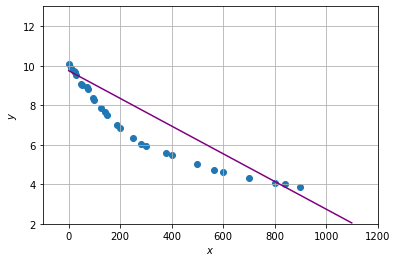

In [3]:
fig = plt.figure()
kx = fig.add_subplot(111)
kx.set_xlim([-100, 1200])
kx.set_ylim([2, 13])
c = np.arange(-100, 1000, 1)
plt.scatter(x, y)
plt.plot(k*c+b, color = 'purple')
plt.xlabel(r'$x$') #подпись осей
plt.ylabel(r'$y$')
plt.grid(True)
plt.show()

## Часть 2. Метод Лангранжа

В данной части курсовой работе мы строим интерполяционный многочлен Лагранжа, то есть многочлен минимальной степени, принимающий заданные значения в заданном наборе точек, получается нам нужно решить задачу интерполяции.

Cначала считаем данные из excel листа и выведем их.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_excel('/Users/sabinabekkieva/Desktop/lagrange.xlsx')
data = data.dropna()
x = data.iloc[:,0].tolist()
y = data.iloc[:,1].tolist()
print(x)
print(y)

[233.0, 232.5, 232.8, 234.1, 234.0, 233.0, 231.0, 228.5, 220.1, 218.6, 211.2, 204.5, 198.2, 178.3, 176.7, 173.6, 166.8, 158.9, 155.7, 139.6, 135.4, 122.4, 114.0, 113.9, 107.8, 101.5, 95.4]
[0, 8, 10, 19, 20, 39, 50, 58, 75, 78, 101, 118, 126, 151, 153, 201, 252, 287, 302, 376, 403, 504, 603, 605, 706, 807, 904]


Напишем функцию, строящую интерполяционный многочлен Лангранжа

In [5]:
def create_polynom(x, i):
    def polynom(X):
        divider = 1
        result = 1
        for j in range(len(x)):
            if j != i:
                result *= (X-x[j])
                divider *= (x[i]-x[j])
            if divider == 0:
                divider = 1
        return result/divider
    return polynom

def create_Lagrange_polynom(x, y):
    polynom = []
    for i in range(len(x)):
        polynom.append(create_polynom(x, i))

    def lagrange_polynom(X):
        result = 0
        for i in range(len(y)):
            result += y[i]*polynom[i](X)
        return result
    return lagrange_polynom
lag_pol = create_Lagrange_polynom(x, y)

По посчитанным параметрам изобразим полученный многочлен с помощью matplotlib

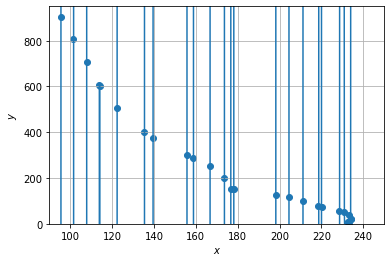

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim([90, 250])
ax.set_ylim([0, 950])
plt.scatter(x, y) 
c = np.arange(0, 260, 1)
plt.plot(lag_pol(c))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.grid(True)
plt.show()

## Вывод

Python имеет множество библиотек, с помощью которых легко и быстро можно решать различные задачи. 